In [1]:
# imports
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
spiData = pd.read_csv('SPIData.csv')
spiData.head(5)

,SPI Rank,Country,SPI country code,SPI year,Status,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Satisfied demand for contraception (% of women),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Equality of political power by gender (0=unequal power; 4=equal power),Discrimination and violence against minorities (0=low; 10=high),Acceptance of gays and lesbians (0=low; 100=high),Quality weighted universities (points),Citable documents,Women with advanced education (%),Years of tertiary schooling
0,NaN,World,WWW,2020,NaN,64.24,74.65,60.82,57.25,84.63,...,73.8590,1.6918,1.6908,1.7663,7.3247,0.3343,223.0656,0.5025,0.5444,2.0406
1,NaN,World,WWW,2019,NaN,64.32,74.31,60.75,57.90,84.36,...,73.6103,1.8016,1.8458,1.9055,7.2709,0.3149,214.7963,0.4749,0.5308,2.0206
2,NaN,World,WWW,2018,NaN,64.05,74.06,60.54,57.54,84.04,...,73.3432,1.8182,1.8529,1.8884,7.4107,0.2772,195.1538,0.4527,0.5159,1.9994
3,NaN,World,WWW,2017,NaN,63.78,73.62,60.17,57.56,83.66,...,73.1914,1.8684,1.8280,1.9282,7.5079,0.2634,173.0154,0.4425,0.4995,1.9618
4,NaN,World,WWW,2016,NaN,63.23,73.24,59.07,57.39,83.24,...,73.0024,1.8897,1.8477,1.9353,7.5401,0.2556,158.3055,0.4252,0.4824,1.8963


In [3]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['SPI year'],spiData['Social Progress Index']],axis=1))

In [4]:
# Making sure row is for 2020
for index, row in spiData.iterrows():
    if row['SPI year']!=2020:
        spiData.drop(index, inplace=True)

In [5]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['Social Progress Index']],axis=1))
spiData

,Country,Social Progress Index
0,World,64.24
10,Afghanistan,42.29
20,Albania,75.41
30,Algeria,69.92
40,Angola,48.16
...,...,...
1590,Uruguay,82.99
1600,Uzbekistan,64.98
1610,Vietnam,68.85
1620,Zambia,55.34


In [6]:
democracyData = pd.read_csv('DemocracyData.csv')
democracyData.head(5)

,geo,name,time,Democracy index (EIU),Electoral pluralism index (EIU),Government index (EIU),Political participation index(EIU),Political culture index (EIU),Civil liberties index (EIU),Change in democracy index (EIU)
0,afg,Afghanistan,2006,30.6,61.70,0.00,22.2,25.0,44.10,NaN
1,afg,Afghanistan,2007,30.4,56.70,3.95,22.2,25.0,44.10,-0.2
2,afg,Afghanistan,2008,30.2,51.70,7.90,22.2,25.0,44.10,-0.2
3,afg,Afghanistan,2009,27.5,38.35,7.90,25.0,25.0,41.15,-2.7
4,afg,Afghanistan,2010,24.8,25.00,7.90,27.8,25.0,38.20,-2.7


In [7]:
democracyData = pd.DataFrame(pd.concat([democracyData['name'],democracyData['time'],democracyData['Democracy index (EIU)']],axis=1))
democracyData

,name,time,Democracy index (EIU)
0,Afghanistan,2006,30.6
1,Afghanistan,2007,30.4
2,Afghanistan,2008,30.2
3,Afghanistan,2009,27.5
4,Afghanistan,2010,24.8
...,...,...,...
2333,Zimbabwe,2015,30.5
2334,Zimbabwe,2016,30.5
2335,Zimbabwe,2017,31.6
2336,Zimbabwe,2018,31.6


In [8]:
# Making sure row is for 2020
for index, row in democracyData.iterrows():
    if row['time']!=2019:
        democracyData.drop(index, inplace=True)

In [9]:
democracyData = democracyData.drop(columns=['time'])

In [10]:
data = []

In [11]:
for index, row in spiData.iterrows():
    country = row['Country']
    socialProgressIndex = row['Social Progress Index']

    for i, r in democracyData.iterrows():
        newCountry = r['name']
        democracyIndex = r['Democracy index (EIU)']

        if country==newCountry:
            data.append([socialProgressIndex,democracyIndex])

In [12]:
X = pd.DataFrame(data)[0]
y = pd.DataFrame(data)[1]

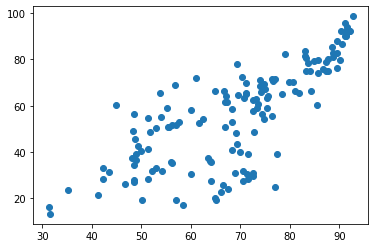

In [13]:
plt.scatter(X,y)